In [7]:
# required imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [8]:
# read in data
admissions = pd.read_csv('ADMISSIONS.csv', parse_dates = [['ADMITTIME','DISCHTIME']])
diag_groups = pd.read_csv('DRGCODES.csv')
patients = pd.read_csv('PATIENTS.csv')
procs = pd.read_csv('PROCEDURES_ICD.csv')
diags = pd.read_csv('DIAGNOSES_ICD.csv')
prescript = pd.read_csv('PRESCRIPTIONS.csv')
# not developed yet, but likely to use
#stats = pd.read_csv('CHARTEVENTS.csv')

In [9]:
# preview content (uncomment as necessary - only last active line will show)
#admissions.head(10)
#diag_groups.head(10)
#patients.head(10)
#procs.head(10)
#diags.head(10)
prescript.head(30)
#stats.head(10)

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTDATE,ENDDATE,DRUG_TYPE,DRUG,DRUG_NAME_POE,DRUG_NAME_GENERIC,FORMULARY_DRUG_CD,GSN,NDC,PROD_STRENGTH,DOSE_VAL_RX,DOSE_UNIT_RX,FORM_VAL_DISP,FORM_UNIT_DISP,ROUTE
0,2214776,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Tacrolimus,Tacrolimus,Tacrolimus,TACR1,021796,4.690617e+08,1mg Capsule,2,mg,2,CAP,PO
1,2214775,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Warfarin,Warfarin,Warfarin,WARF5,006562,5.601728e+07,5mg Tablet,5,mg,1,TAB,PO
2,2215524,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Heparin Sodium,NaN,NaN,HEPAPREMIX,006522,3.380550e+08,"25,000 unit Premix Bag","25,000",UNIT,1,BAG,IV
3,2216265,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,BASE,D5W,NaN,NaN,HEPBASE,NaN,0.000000e+00,HEPARIN BASE,250,ml,250,ml,IV
4,2214773,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Furosemide,Furosemide,Furosemide,FURO20,008208,5.482972e+07,20mg Tablet,20,mg,1,TAB,PO
5,2214774,6,107064,NaN,2175-06-11 00:00:00,2175-06-15 00:00:00,MAIN,Warfarin,Warfarin,Warfarin,WARF0,014198,5.601698e+07,Check with MD for Dose,1,dose,1,dose,PO
6,2215525,6,107064,NaN,2175-06-12 00:00:00,2175-06-12 00:00:00,MAIN,Heparin Sodium,NaN,NaN,HEPAPREMIX,006522,3.380550e+08,"25,000 unit Premix Bag","25,000",UNIT,1,BAG,IV
7,2216266,6,107064,NaN,2175-06-12 00:00:00,2175-06-12 00:00:00,BASE,D5W,NaN,NaN,HEPBASE,NaN,0.000000e+00,HEPARIN BASE,250,ml,250,ml,IV
8,2215526,6,107064,NaN,2175-06-12 00:00:00,2175-06-13 00:00:00,MAIN,Heparin Sodium,NaN,NaN,HEPAPREMIX,006522,3.380550e+08,"25,000 unit Premix Bag","25,000",UNIT,1,BAG,IV
9,2214778,6,107064,NaN,2175-06-12 00:00:00,2175-06-13 00:00:00,MAIN,Warfarin,Warfarin,Warfarin,WARF2,006561,5.601708e+07,2mg Tab,2,mg,1,TAB,PO


In [10]:
# dropping all unnecessary columns
admissions = admissions.drop(columns = ['ADMITTIME_DISCHTIME', 'ROW_ID', 'DEATHTIME', 'ADMISSION_LOCATION',
                                        'DISCHARGE_LOCATION', 'LANGUAGE', 'MARITAL_STATUS', 'EDREGTIME', 'EDOUTTIME',
                                       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA'])
diag_groups = diag_groups.drop(columns = ['ROW_ID', 'DRG_SEVERITY', 'DRG_MORTALITY'])
patients = patients.drop(columns = ['ROW_ID', 'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN', 'EXPIRE_FLAG'])
procs = procs.drop(columns = ['ROW_ID', 'SEQ_NUM'])
diags = diags.drop(columns = ['ROW_ID', 'SEQ_NUM'])
prescript = prescript.drop(columns = ['ROW_ID', 'ICUSTAY_ID', 'STARTDATE', 'ENDDATE', 'DRUG_TYPE', 'DRUG_NAME_POE',
                                      'DRUG_NAME_GENERIC', 'GSN', 'NDC', 'PROD_STRENGTH', 'FORMULARY_DRUG_CD'])
#stats = stats.drop(columns = ['ROW_ID', 'ICUSTAY_ID', 'ITEMID', 'STORETIME', 'CGID', 'WARNING', 'ERROR',
#                              'RESULTSTATUS', "STOPPED"])

In [11]:
# EDA preparation - extract info and compartmentalize into different dataframes
eda_admit_type_df = admissions.iloc[:,2]
eda_insurance_df = admissions.iloc[:,3]
eda_religion_df = admissions.iloc[:,4]
eda_ethnicity_df = admissions.iloc[:,5]
eda_gender_df = patients.iloc[:,1]
eda_drugs_df = prescript.iloc[:,2]

In [ ]:
# admission type histogram
plt.hist(eda_admit_type_df.values)
plt.xlabel('Admit Situation')
plt.ylabel('Number of patients')
plt.title('Admission type by patient')

Text(0.5,1,'Insurance type by patient')

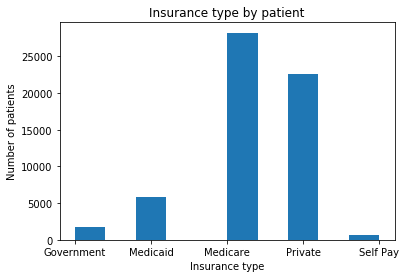

In [63]:
# insurance type histogram
plt.hist(eda_insurance_df.values)
plt.xlabel('Insurance type')
plt.ylabel('Number of patients')
plt.title('Insurance type by patient')

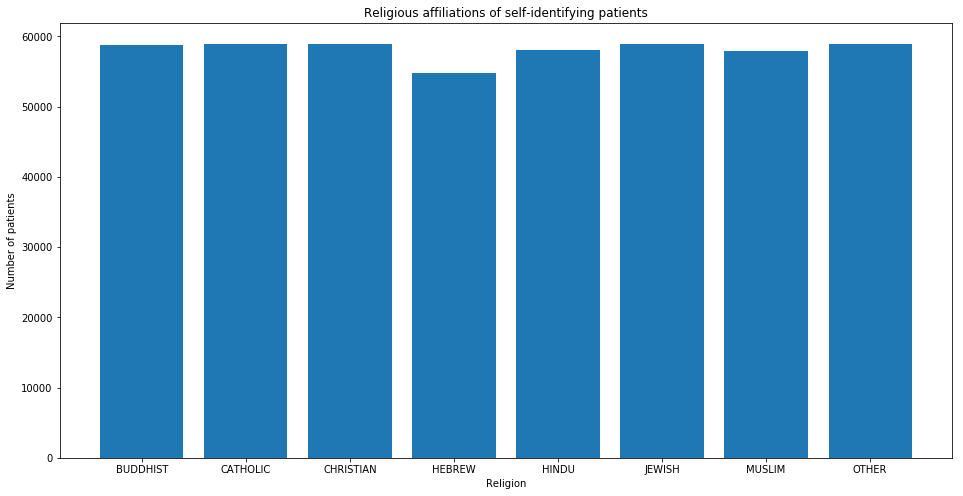

In [67]:
# religion histogram
eda_religion_df = eda_religion_df.replace('NOT SPECIFIED',np.NaN)
eda_religion_df = eda_religion_df.replace('nan', np.NaN)
eda_religion_df = eda_religion_df.replace('UNOBTAINABLE', np.NaN)
# simplifying various christian denominations
eda_religion_df = eda_religion_df.replace('7TH DAY ADVENTIST', 'CHRISTIAN')
eda_religion_df = eda_religion_df.replace('BAPTIST', 'CHRISTIAN')
eda_religion_df = eda_religion_df.replace('CHRISTIAN SCIENTIST', 'CHRISTIAN')
eda_religion_df = eda_religion_df.replace('EPISCOPALIAN', 'CHRISTIAN')
eda_religion_df = eda_religion_df.replace('GREEK ORTHODOX', 'CHRISTIAN')
eda_religion_df = eda_religion_df.replace('JEHOVAH\'S WITNESS', 'CHRISTIAN')
eda_religion_df = eda_religion_df.replace('LUTHERAN', 'CHRISTIAN')
eda_religion_df = eda_religion_df.replace('METHODIST', 'CHRISTIAN')
eda_religion_df = eda_religion_df.replace('PROTESTANT QUAKER', 'CHRISTIAN')
eda_religion_df = eda_religion_df.replace('ROMANIAN EAST. ORTH', 'CHRISTIAN')
eda_religion_df = eda_religion_df.replace('UNITARIAN-UNIVERSALIST', 'CHRISTIAN')
eda_religion_df = eda_religion_df.dropna(axis=0)
fig, ax = plt.subplots(1, figsize = (16,8))
ax.bar(eda_religion_df, eda_religion_df.index)
plt.xlabel('Religion')
plt.ylabel('Number of patients')
plt.title('Religious affiliations of self-identifying patients')
plt.show()
# TODO: display exact totals on top of bars maybe, since they are of similar heights

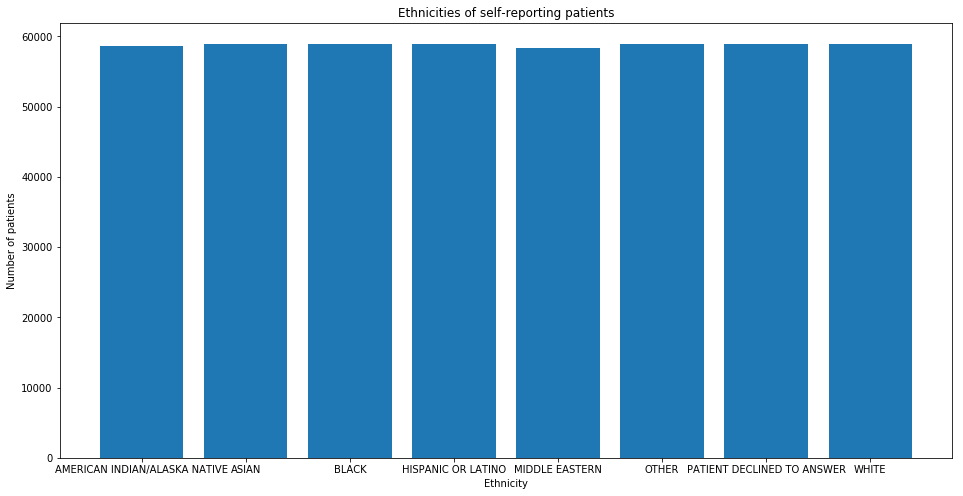

In [69]:
# ethnicity histogram
eda_ethnicity_df = eda_ethnicity_df.replace('UNKNOWN/NOT SPECIFIED', np.NaN)
eda_ethnicity_df = eda_ethnicity_df.replace('UNABLE TO OBTAIN', np.NaN)
eda_ethnicity_df = eda_ethnicity_df.replace('AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE', \
                                            'OTHER')
eda_ethnicity_df = eda_ethinicity_df.replace('AMERICAN INDIAN/ALASKA NATIVE', 'OTHER')
eda_ethnicity_df = eda_ethnicity_df.replace('HISPANIC/LATINO - PUERTO RICAN', 'HISPANIC OR LATINO')
eda_ethnicity_df = eda_ethnicity_df.replace('HISPANIC/LATINO - SALVADORAN', 'HISPANIC OR LATINO')
eda_ethnicity_df = eda_ethnicity_df.replace('HISPANIC/LATINO - MEXICAN', 'HISPANIC OR LATINO')
eda_ethnicity_df = eda_ethnicity_df.replace('HISPANIC/LATINO - HONDURAN', 'HISPANIC OR LATINO')
eda_ethnicity_df = eda_ethnicity_df.replace('HISPANIC/LATINO - GUATEMALAN', 'HISPANIC OR LATINO')
eda_ethnicity_df = eda_ethnicity_df.replace('HISPANIC/LATINO - DOMINICAN', 'HISPANIC OR LATINO')
eda_ethnicity_df = eda_ethnicity_df.replace('HISPANIC/LATINO - CUBAN', 'HISPANIC OR LATINO')
eda_ethnicity_df = eda_ethnicity_df.replace('HISPANIC/LATINO - COLOMBIAN', 'HISPANIC OR LATINO')
eda_ethnicity_df = eda_ethnicity_df.replace('HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)',\
                                            'HISPANIC OR LATINO')
eda_ethnicity_df = eda_ethnicity_df.replace('CARIBBEAN ISLAND', 'OTHER')
eda_ethnicity_df = eda_ethnicity_df.replace('MULTI RACE ETHNICITY', 'OTHER')
eda_ethnicity_df = eda_ethnicity_df.replace('WHITE - RUSSIAN', 'WHITE')
eda_ethnicity_df = eda_ethnicity_df.replace('WHITE - OTHER EUROPEAN', 'WHITE')
eda_ethnicity_df = eda_ethnicity_df.replace('WHITE - EASTERN EUROPEAN', 'WHITE')
eda_ethnicity_df = eda_ethnicity_df.replace('WHITE - RUSSIAN', 'WHITE')
eda_ethnicity_df = eda_ethnicity_df.replace('WHITE - BRAZILIAN', 'HISPANIC OR LATINO')
eda_ethnicity_df = eda_ethnicity_df.replace('SOUTH AMERICAN', 'HISPANIC OR LATINO')
eda_ethnicity_df = eda_ethnicity_df.replace('PORTUGUESE', 'WHITE')
eda_ethnicity_df = eda_ethnicity_df.replace('NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER', \
                                            'ASIAN')
eda_ethnicity_df = eda_ethnicity_df.replace('BLACK/HAITIAN', 'BLACK')
eda_ethnicity_df = eda_ethnicity_df.replace('BLACK/CAPE VERDEAN', 'BLACK')
eda_ethnicity_df = eda_ethnicity_df.replace('BLACK/CAPE VERDEAN', 'BLACK')
eda_ethnicity_df = eda_ethnicity_df.replace('BLACK/AFRICAN AMERICAN', 'BLACK')
eda_ethnicity_df = eda_ethnicity_df.replace('BLACK/AFRICAN', 'BLACK')
eda_ethnicity_df = eda_ethnicity_df.replace('ASIAN - VIETNAMESE', 'ASIAN')
eda_ethnicity_df = eda_ethnicity_df.replace('ASIAN - THAI', 'ASIAN')
eda_ethnicity_df = eda_ethnicity_df.replace('ASIAN - OTHER', 'ASIAN')
eda_ethnicity_df = eda_ethnicity_df.replace('ASIAN - KOREAN', 'ASIAN')
eda_ethnicity_df = eda_ethnicity_df.replace('ASIAN - JAPANESE', 'ASIAN')
eda_ethnicity_df = eda_ethnicity_df.replace('ASIAN - FILIPINO', 'ASIAN')
eda_ethnicity_df = eda_ethnicity_df.replace('ASIAN - CHINESE', 'ASIAN')
eda_ethnicity_df = eda_ethnicity_df.replace('ASIAN - CAMBODIAN', 'ASIAN')
eda_ethnicity_df = eda_ethnicity_df.replace('ASIAN - ASIAN INDIAN', 'ASIAN')
eda_ethnicity_df = eda_ethnicity_df.replace('nan', np.NaN)
eda_ethnicity_df = eda_ethnicity_df.dropna(axis=0)
fig, ax = plt.subplots(1, figsize = (16,8))
ax.bar(eda_ethnicity_df, eda_ethnicity_df.index)
plt.xlabel('Ethnicity')
plt.ylabel('Number of patients')
plt.title('Ethnicities of self-reporting patients')
plt.show()
# TODO: display exact totals on top of bars maybe, since they are of similar heights

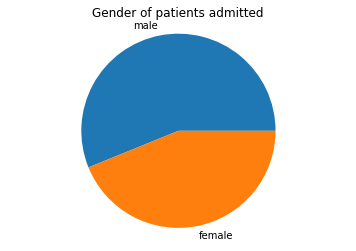

In [15]:
# patient gender piechart
eda_gender_df = eda_gender_df.replace('M',1)
eda_gender_df = eda_gender_df.replace('F',0)
num_male = eda_gender_df.sum()
num_female = len(eda_gender_df.index) - num_male
sizes = [num_male, num_female]
labels = ['male', 'female']
plt.pie(sizes, labels = labels)
plt.axis('equal')
plt.title('Gender of patients admitted')
plt.show()
# TODO: display percentages on wedges, to see how much they differ from 50-50 split

In [70]:
# further cleaning, post EDA
admissions = admissions.drop(columns = ['ADMISSION_TYPE', 'INSURANCE', 'RELIGION', 'ETHNICITY'])
admissions = admissions.dropna(axis=0)
diag_groups = diag_groups.dropna(axis=0)
patients = patients.dropna(axis=0)
procs = procs.dropna(axis=0)
diags = diags.dropna(axis=0)
prescript = prescript.dropna(axis=0)
#stats = stats.dropna(axis=0)

In [71]:
# new summary dataframe
# order admissions by SUBJECT_ID, HADM_ID
summary = admissions.sort_values(by = ['SUBJECT_ID', 'HADM_ID'])
# order patients by SUBJECT_ID
patients = patients.sort_values(by = ['SUBJECT_ID'])
# create new column after HADM_ID mapping gender to SUBJECT_ID
summary = pd.merge(summary, patients, how='inner', on='SUBJECT_ID')
# reorder columns
summary = summary[summary.columns[[0,1,3,2]]]
# rename DIAGNOSIS to INIT_DIAG
summary.rename(columns={'DIAGNOSIS':'INIT_DIAG'}, inplace=True)
# summary dataframe progress check (comment/uncomment)
summary.head(10)

,SUBJECT_ID,HADM_ID,GENDER,INIT_DIAG
0,2,163353,M,NEWBORN
1,3,145834,M,HYPOTENSION
2,4,185777,F,"FEVER,DEHYDRATION,FAILURE TO THRIVE"
3,5,178980,M,NEWBORN
4,6,107064,F,CHRONIC RENAL FAILURE/SDA
5,7,118037,F,NEWBORN
6,8,159514,M,NEWBORN
7,9,150750,M,HEMORRHAGIC CVA
8,10,184167,F,NEWBORN
9,11,194540,F,BRAIN MASS


In [72]:
# drog subject ID column in diag_groups, and sort values by hosp admit
diag_groups = diag_groups.drop(columns = ['SUBJECT_ID', 'DRG_TYPE', 'DRG_CODE'])
diag_groups = diag_groups.sort_values(by = ['HADM_ID'])
# merge diagnosis related group as confirmation / more details
summary = pd.merge(summary, diag_groups, how='inner', on='HADM_ID')
# rename column for description to diagnosis description (abbreviated)
summary.rename(columns={'DESCRIPTION':'DIAG_DESC'}, inplace=True)
summary.head(10)

,SUBJECT_ID,HADM_ID,GENDER,INIT_DIAG,DIAG_DESC
0,2,163353,M,NEWBORN,"Neonate, Bwt > 2499g, Normal Newborn Or Neonat..."
1,2,163353,M,NEWBORN,NORMAL NEWBORN
2,3,145834,M,HYPOTENSION,SEPTICEMIA AGE >17
3,4,185777,F,"FEVER,DEHYDRATION,FAILURE TO THRIVE",HIV WITH MAJOR RELATED CONDITION
4,5,178980,M,NEWBORN,NORMAL NEWBORN
5,6,107064,F,CHRONIC RENAL FAILURE/SDA,KIDNEY TRANSPLANT
6,7,118037,F,NEWBORN,NORMAL NEWBORN
7,7,118037,F,NEWBORN,"Neonate, Bwt > 2499g, Normal Newborn Or Neonat..."
8,8,159514,M,NEWBORN,NEONATE WITH OTHER SIGNIFICANT PROBLEMS
9,9,150750,M,HEMORRHAGIC CVA,INTRACRANIAL HEMORRHAGE & STROKE W/ INFARCTION


In [73]:
# change summary dataframe to sort by HADM_ID and remove SUBJECT_ID
summary = summary.drop(columns = ['SUBJECT_ID'])
summary = summary.sort_values(by = ['HADM_ID'])
# remove rows in which duplicate HADM_IDs occur
summary = summary.drop_duplicates(subset = ['HADM_ID'])

In [74]:
# drop subject ID column in diags, and sort values by hosp admit
diags = diags.drop(columns = ['SUBJECT_ID'])
diags = diags.sort_values(by = ['HADM_ID'])

summary['REVISED_DIAG'] = np.nan
# create a for loop to create and add array of strings as an entry to dataframe
for i in range(len(summary['HADM_ID'].values)):
    summary.iloc[i,4] = str(diags.loc[diags['HADM_ID'] == \
                                      summary['HADM_ID'].iloc[i], 'ICD9_CODE'].values.T.tolist())

In [75]:
# do the same with procs dataframe since they also use ICD-9 codes
procs = procs.drop(columns = ['SUBJECT_ID'])
procs = procs.sort_values(by = ['HADM_ID'])

summary['PROC_LIST'] = np.nan
# create a for loop to create and add array of strings as an entry to dataframe
for j in range(len(summary['HADM_ID'].values)):
    summary.iloc[j,5] = str(procs.loc[procs['HADM_ID'] == \
                                      summary['HADM_ID'].iloc[j], 'ICD9_CODE'].values.T.tolist())

In [76]:
# display summary dataframe below
summary.head()

,HADM_ID,GENDER,INIT_DIAG,DIAG_DESC,REVISED_DIAG,PROC_LIST
85999,100001,F,DIABETIC KETOACIDOSIS,DIABETES W CC,"['25083', '25063', '5363', 'V1351', '4580', '2...",[]
82155,100003,M,UPPER GI BLEED,Peptic Ulcer & Gastritis,"['7823', '53550', '53789', '45621', '5715', '4...","[3893, 4443, 9607, 9904]"
17973,100006,F,COPD FLARE,CHRONIC OBSTRUCTIVE PULMONARY DISEASE,"['20300', '7850', '2761', 'V1251', '486', '518...","[9925, 9390]"
41623,100007,F,BOWEL OBSTRUCTION,Major Small & Large Bowel Procedures,"['5570', '56081', '9973', '486', '4019']","[5459, 4562]"
1055,100009,M,CORONARY ARTERY DISEASE,Coronary Bypass w/o Cardiac Cath Or Percutaneo...,"['V1582', 'V4582', '2859', 'V8535', '2720', '4...","[3795, 3615, 3613, 3961]"


In [77]:
# feature engineering on prescription data
# drop subject_id column
prescript = prescript.drop(columns = ['SUBJECT_ID'])
# order by hadm_id column
prescript = prescript.sort_values(by = ['HADM_ID'])
# create 2 new columns related to the ratio of dosage and dosage units
prescript['CONCENTRATION'] = np.nan
prescript['CONC_UNIT'] = np.nan
# reorder columns in prescript
prescript = prescript[prescript.columns[[0,1,2,3,4,5,7,8,6]]]
# feature engineering of dosage strength (concentration) and units
for r in range(len(prescript.index)):
    dosage = prescript.iloc[r,2].replace(',', '')
    unit_dose = prescript.iloc[r,3]
    form_amt = prescript.iloc[r,4]
    unit_form = prescript.iloc[r,5]
    if '-' not in dosage:
        dosage = float(dosage)
    else:
        dosage = np.sum([float(i) for i in dosage.split('-')])/2
    if form_amt == 'tab':
        form_amt = 1
    else:
        if '-' not in form_amt:
            form_amt = float(form_amt)
        else:
            form_amt = np.sum([float(j) for j in form_amt.split('-')])/2
    if form_amt != 0:
        dose_ratio = dosage / form_amt
    else:
        dose_ratio = dosage
    unit_ratio = unit_dose + '/' + unit_form
    prescript.iloc[r,6] = dose_ratio
    prescript.iloc[r,7] = unit_ratio


ValueError: could not convert string to float: 'tab'

In [ ]:
# review content (comment/uncomment)
prescript.head(10)
prescript['DRUG'].value_counts()

In [ ]:
# merge dataframe

summary.head()

In [ ]:
import pandas as pd

data = pd.DataFrame({'patientID'：[111,111,111,112,112,113],
                    'drugs':['A','A','B','A','C','A']})
print(data)


new_data = data['Drugs'].value_counts()
print(new_data)
print()

drugs_dict = {'A':[],'B':[],'C':[]}

for row in data.itertuples():
    patient = row[1]
    drug = row[2]
    
    if patient in drugs_dict[drug]:
        new_data[drug] -=1
    else:
        drugs_dict[drug].append(patient)
print(new_data)

#then make plot of new_data

In [ ]:
from sklearn.model_selection import cross_val_score
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)



In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())